# 2. Core concepts

In this notebook, we will review:
- What are estimators in scikit-learn, and some of their functions.
- How estimators can be supervised models that perform classification or regression tasks, as well as unsupervised models.
- Common metrics used to evaluate the estimator performance.

---

# Some important concepts

Let's quickly review some distinctions in Machine Learning (ML). This section is a refresher. If you are lacking some knowledge on these concepts, please consult our suggested reading in [Notebook 1](./01-preliminaries.ipynb).

## What machine learning is about
(...)
- predicting data

## Supervised vs. unsupervised learning
- (below taken from Yarkoni's tutorial)
Broadly speaking, machine learning can be carved up into two forms of learning: supervised and unsupervised. We say that learning is supervised whenever we know the true values that our model is trying to predict, and hence, are in a position to "supervise" the learning process by quantifying prediction accuracy and making iterative adjustments. "Ordinary" least-squares regression, in the machine learning context, is an example of supervised learning: our model takes as its input both a vector of features (conventionally labeled X) and a vector of labels (y). Researchers often use different terminology in various biomedical and social science disciplines—often calling X variables or predictors, and y the outcome or dependent variable—but the idea is the same.

We expect to train our model using a dataset where we know the ground truth—i.e., we have labeled examples of spam, movie ratings, and schizophrenia diagnosis, in addition to any number of potential features we might use to try and predict each of these labels.

### Unsupervised
    - the goal is to find interesting or useful structure in the data
    - we don't have the ground truth

## Supervised learning: classification vs. regression
- (below taken from Yarkoni's tutorial)
Within the class of supervised learning problems, we can draw a further distinction between classification problems and regression problems. In both cases, the goal is to develop a predictive model that recovers the true labels as accurately as possible. The difference between the two lies in the nature of the labels: in classification, the labels are discrete; in regression, they're continuous.

# Estimators

In _scikit-learn_ an [estimator](https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#estimators-objects) is a Python object that __learns from data__. That means, both supervised (classification or regression) and unsupervised models can be constructed and fitted using estimators. We will review some properties of estimators in _scikit-learn_ using an example for each of these types of models.


## Linear Regression

A linear regression is an example of a supervised regression model. Used as a machine learning model, linear regression predicts the values of a continuous variable from a __linear combination__ of one or more features.

For example, if we had a feature matrix $X$ contaning the values of features $x1$ and $x2$, the value $\hat{y}$ predicted by linear regression could be expressed as:

$$\hat{y} = ax1 + bx2 + c$$

> where $a$, $b$ and $c$ are the parameters the model learns from the data to make the predictions

- !! Add vector notation

- !! Explain training and loss
     - Supervised approach --> The model learns the parameters that minimize the distance between the predictve value and the real value


Let's now see how we can fit a linear regression model using scikit-learn. But first we will need to create a dataset for this exercise.

With this toolbox, we can easily create a fake dataset for fitting a linear regression model using the `make_regression` method (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)). Let's create one containing 400 samples and 100 features. We will also define 20 of these features as informative, and add some gaussian noise to the data to make the task harder for the model:

In [ ]:
import numpy as np
from sklearn.datasets import make_regression

# Create fake dataset
X, y = make_regression(
    n_samples=400, n_features=100, n_informative=20, noise=10, random_state=0
)

# Print shape of feature matrix and labels
print(f"Shape of dataset: {np.shape(X)}")
print(f"Shape of labels: {np.shape(y)}")

Since it's a regression problem, let's make sure the target of our model is a continuous variable. Let's print the first ten values of `y`:

In [ ]:
print(y[:10])

Now let's create a linear regression estimator using `LinearRegression` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression)).

In [ ]:
from sklearn.linear_model import LinearRegression

# Create model
reg = LinearRegression()

Estimator objects contain certain parameters that define how they will behave when learning the data, as well as their outputs. These are called __estimator parameters__. Let's inspect the parameters of `reg`:

In [ ]:
# Print model parameters
vars(reg)

These parameters can be changed by modifying their corresponding attributes when calling the estimator, or afterwards using `set_params`:

In [ ]:
# Set new model parameters
reg.set_params(**{"normalize": True})
vars(reg)

### Training the model

Once the estimator object has been created, it can now learn the value of its parameters from the data. For this we need to call the `fit` method, and pass our feature matrix (`X`) and true values (`y`) as input:

In [ ]:
# Fit linear regression model
reg = reg.fit(X, y)

Let's inspect the attributes of `reg` again:

In [ ]:
# Print the names of the attributes
vars(reg).keys()

`reg` now contains new attributes. These are refered to as __estimated parameters__, because they have been learned from the data. In scikit-learn, these are indexed by an underscore (`_`) at the end. 

For example, we can now access the coefficients learned by our linear model. We should have as many coefficients as features in our dataset:

In [ ]:
print(f"Number of coefficients: {reg.coef_.shape[0]}")

Let's also print the values of some of them, and the value of the intercept.

In [ ]:
# Define coefficients and intercept
coefs = reg.coef_
intercept = reg.intercept_

# Print
print(f"Model coefficients (first 10):\n {coefs[:10]} \n")
print(f"Model intercept: \n {intercept}")

{To-Do: Mention the importance of not interpreting these parameters}

### Making predictions with the model

Now that our model is fitted, we can use it to make predictions. In scikit-learn, this is achieved by calling the function `predict`. 

Let's predict the values of `X` using our fitted model, and visually compare them to their real values on the first ten samples:

In [ ]:
import pandas as pd

# Predict labels with trained model
y_pred = reg.predict(X)

# Create dataframe for printing the predictions
df = pd.DataFrame({"y_pred": y_pred[:10], "y_real": y[:10]})
df

### Scoring the model

We can use these predictions to evaluate the performance of the model by quantifing the difference between the predicted values and the real ones.

In _scikit-learn_ we can evaluate the performance of the estimator using the function `score`:

In [ ]:
score = reg.score(X, y)
print(f"Linear model R2: {np.round(score,3)}")

By default, linear models are evaluated by calculating $R^2$, also called __coefficient of determination__. $R^2$ quantifies how much of the total variance of the outcome variable (`y`) is explained by the fitted model. The best possible value is 1. The higher the value, the best job the model does at explaining the data. You can read more about the implementation of $R^2$ in _scikit-learn_ [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).

#### ✍️ Exercise

There are other scoring metrics for regression problems. Check the module [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for an overview of the alternatives. Pick one, and implement it in the cell below. Press the three dots to reveal the solution.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse}")

## Logistic regression

As mentioned, classification models are also estimators. One of the most popular classification models is __logistic regression__. Logistic regression uses a [logistic function](https://en.wikipedia.org/wiki/Logistic_function) to estimate the probability of the classes.


Let's create a fake dataset ready for classification using the `make_classification` method (read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)): 

In [ ]:
from sklearn.datasets import make_classification

# Create fake dataset
X, y = make_classification(
    n_samples=400, n_features=100, n_informative=20, random_state=0
)

Our `y` should now be a categorical variable. Let's print 10 samples of it to make sure:

In [ ]:
print(y[:10])

Let's now create a `LogisticRegression` estimator (read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)) and fit it to our data:

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create model
clf = LogisticRegression()

# Fit model
clf = clf.fit(X, y)

#### ✍️ Exercise

Can you compare the first 10 predictions of the fitted model to their real values?  Write your answer in the cell below, and press the three dots to reveal the solution.

In [ ]:
# Predict labels with trained model
y_pred = clf.predict(X[:10])
y_real = y[:10]

# Create dataframe for printing the predictions
df = pd.DataFrame({"y_pred": y_pred, "y_real": y_real})
df

### Probabilistic predictions

Logistic Regression is a [probabilistic classifier](https://en.wikipedia.org/wiki/Probabilistic_classification), meaning it predicts a probability distribution over the classes.

In _scikit-learn_ we can inspect the probabilities assigned to each class in the following manner:

In [ ]:
# Predict the probability of each class
y_pred_proba = clf.predict_proba(X[:10])

# Create dataframe for printing the predictions
df = pd.DataFrame(y_pred_proba, columns=["class 0", "class 1"])
df

By default, the predictions made by `LogisticRegression` when calling `score` are evaluated by computing the __mean accuracy__ of the predictions:

In [ ]:
# Score predictions
score = clf.score(X, y)
print(f"Mean accuracy: {np.round(score, 2)}")

Besides scoring the model, in classification problems, it is very common to plot the __confusion matrix__ of the predictions. You can go over our [optional material](#Optional-material) to explore this topic.

## K-Means

Unsupervised models are also estimators in _scikit-learn_, since they also learn from data. One type of unsupervised models are __clustering algorithms__. These learn to group the data from their feature values so that observations within a group are more similar than those between groups. You can read more about clustering [here](https://github.com/martinagvilas/intro_stat_learning/blob/master/notebooks/lab2_clustering.ipynb).

A very popular clustering algorithm is __k-means__. This method partitions the data into $k$ pre-specified clusters in a way that minimizes the within-cluster variation.

Let's implement k-means using _scikit-learn_. We first need to generate a dataset suitable for clustering using `make_blobs` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)) which generates Gaussian shaped blobs. We will create a very simple dataset with only two features, to simplify visualization of the clusters:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Create fake dataset
X, y = make_blobs(
    n_samples=400, n_features=2, random_state=0, cluster_std=1
)

Let's visualize our dataset with a scatterplot, and color the observations according to their real labels:

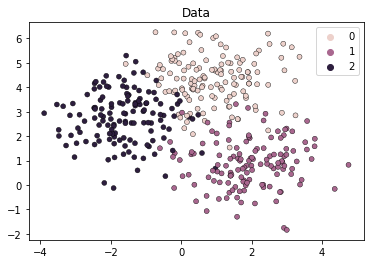

In [3]:
# Plot dataset
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y,
    marker='o', s=25, edgecolor='k', legend=True
).set_title("Data")
plt.show()

We can perform k-means clustering by calling `KMeans` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)). We will ask the algorithm to find 5 clusters ($k=5$):

In [4]:
from sklearn.cluster import KMeans

# Create model
kmeans = KMeans(n_clusters=5)

# Fit model
kmeans = kmeans.fit(X)

Since this is an unsupervised method and there is often no true labels, we don't need to provide `y` as input to `fit`. We also cannot compute the accuracy of the fitted model. But we can compute the average distance of the labeled example to the center of their assigned cluster using the `score` function:

In [5]:
# Compute average distance
score = kmeans.score(X, y)
print(f"Average distance: {score}")

Average distance: -497.71086206671856


If you want to read more about the meaning behind the returned value, read [this answer](https://stackoverflow.com/questions/32370543/understanding-score-returned-by-scikit-learn-kmeans) on stackoverflow.

More importantly, we can now use our fitted model to predict to which cluster the observations belong to. Let's predict the assignment of the first 10 observations:

In [6]:
# Predict cluster label
y_pred = kmeans.predict(X)
print(f"Predicted labels (first 10): {y_pred[:10]}")

Predicted labels (first 10): [4 4 3 2 1 3 3 1 1 0]


We can use a scatterplot to inspect the predicted labels from the model:

In [ ]:
# Plot predicted labels
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y_pred,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

We have the same number of predicted labels as the number of $k$.

### ✍️ Exercise 

Can you create a `KMeans` model specifying the correct number of clusters (`k=3`) and plot its predictions? Compare it with the plot of the real labels. Write your code in the cell below and press the three dots to see the solution.

In [ ]:
#Answer
# Create model
kmeans = KMeans(n_clusters=3)

# Fit model
kmeans = kmeans.fit(X, y)

# Predict labels
y_pred = kmeans.predict(X)

# Plot predicted labels
sns.scatterplot(
    x=X[:, 0], y=X[:, 1], hue=y_pred,
    marker='o', s=25, edgecolor='k', legend=False
).set_title("Data")
plt.show()

# ✏️ Check your knowledge

Load the ABIDE 2 dataset and:

1. Use logistic regression to predict `group` from the features encoding brain data. How accurate is the model? Play around with different accuracy metrics and inspect their difference.
2. Select two features encoding brain data, run a clustering analysis, and plot the predicted labels as shown in this example. Compare it with a similar plot displaying the true group labels.


# Additional reading

- [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html): A useful map to decide which estimator is best given your dataset and learning goal.
- [Core concepts of machine learning](https://github.com/neurohackademy/nh2020-curriculum/blob/master/tu-machine-learning-yarkoni/02-core-concepts.ipynb)  by _Tal Yarkoni_

# Optional material

## Confusion matrix

(...) Explain what is a confusion matrix. Paste picture.


We will now learn how to plot the confusion matrix of the predictions of some model in scikit-learn. 

We will first create an imbalanced classification dataset, meaning one containing more samples from one of the classes than the other. This dataset will make the example more interesting. We can create the imbalance by setting the parameter `weights` of `make_classification`: 

In [ ]:
# Create dataset
X, y = make_classification(
    n_samples=400, n_features=100, n_informative=20, 
    weights=[0.8, 0.2], random_state=0
)

Let's now create and fit a logistic regression model, and use it to make predictions.

In [ ]:
# Create and fit model
clf = LogisticRegression().fit(X, y)

# Use model to make predictions
y_pred = clf.predict(X)

Using the predicted labels, we can now run this computation using the function `confusion_matrix` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)), and display it using `ConfusionMatrixDisplay` (read documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay)):

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y, y_pred, labels=clf.classes_)
cm_display = ConfusionMatrixDisplay(conf_matrix).plot()

(...) Explain output

#### ✍️ Exercise

There are other ways of scoring your model besides computing its mean accuracy. Read the documentation about scoring the [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) and the [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) of a model. 

Can you implement these score functions yourself? Try them below, and press the three dots to reveal the solution.

In [ ]:
# Answer
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y, y_pred)
print(f"Recall: {recall}")